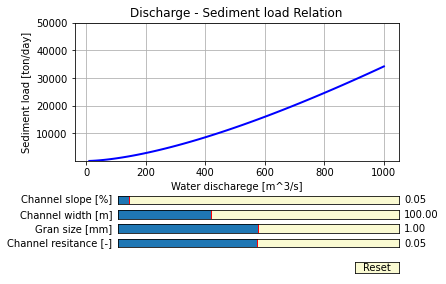

In [ ]:
# IMPORT LIBLARIES

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

# SET PARAMETERS

M = 100 #[1] Number of bin in flow discharge
Qw = np.linspace(10., 1000., M)   #[m^3/s] Water discharge (x-axis)
So = 0.05   #[%] Default channel slope
Bo = 100.   #[m] Defauld channel width
Do = 1.   #[mm] Default channel bed grain size
Cfo = 0.05   #[1] Default bed resistance coefficient
Smin = 0.01; Smax = 1.   #[%] Minimum and maximum values of channel slope
Bmin = 50.; Bmax = 200.   #[m] Minimum and maximum values of channel width
Dmin = 0.01; Dmax = 2.   #[mm] Minimum and maximum values of bed grain size
Cfmin = 0.001; Cfmax = 0.1   #[1] Minimum and maximum values of channel resistance coeffienent
ymin = 10; ymax = 5e4   # Minimun and maximum value of the y-axix of the plot


# More paremters
day_in_sec = 60. * 60. * 24. #[s] One day in second
g = 9.81 #[m/s^2] Gravitational acceleration
Rr = 1.65 #[1] Submerged specific gravity of sediment (quartz)

# Unit transformation
So /= 100.
Do /= 1000.
Czo = (1. / Cfo)**(1./2.)

# setup the figure
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.4)

# compute initial condition
So = 0.05 / 100.; Bo = 100.; Do = 1. / 1000.
Cfo= 0.05; Czo = (1. / Cfo)**(1./2.)

Ho = (4. * 3.**(1./3.) * Bo**3. * Czo**2. * g * Qw**2. * So + 2.**(1./3.) * \
     (9.* Bo**7. * Czo**4. * g**2. * Qw**2. * So**2. + \
     (3. * Bo**9. * Czo**6. * g**3. * Qw**4. * So**3. * \
     (-32. * Qw**2. + 27. * Bo**5. * Czo**2. * g * So))**(1./2.))**(2./3.)) \
      / (6.**(2./3.) * Bo**3. * Czo**2. * g * So * \
     (9. * Bo**7. * Czo**4. * g**2. * Qw**2. * So**2. + \
     (3. * Bo**9. * Czo**6. * g**3. * Qw**4. * So**3. * \
     (-32. * Qw**2. + 27. * Bo**5. * Czo**2.*  g * So))**(1./2.))**(1./3.))
Rho = Ho * Bo / (2. * Ho + Bo)
tauso = Rho * So / (Rr * Do)
Qto = 0.05 * Czo**2. * tauso**2.5 * (g * Rr * Do**3.)**(1./2.)\
      * Bo * (Rr + 1.) * day_in_sec

# plot initial condition
l, = plt.plot(Qw, Qto, lw=2, color='blue')

# setup title and axises
plt.title('Discharge - Sediment load Relation')

ax.set_xlabel('Water discharege [m^3/s]')
ax.set_ylabel('Sediment load [ton/day]')

plt.ylim(ymin, ymax)
plt.grid(b=True, which='both')

# setup sliders
ax_color = 'lightgoldenrodyellow'
ax_S = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=ax_color)
ax_B = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=ax_color)
ax_D = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=ax_color)
ax_Cf = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=ax_color)

slid_S = Slider(ax_S, 'Channel slope [%]', Smin, Smax, valinit=So*100)
slid_B = Slider(ax_B, 'Channel width [m]', Bmin, Bmax, valinit=Bo) 
slid_D = Slider(ax_D, 'Gran size [mm]', Dmin, Dmax, valinit=Do*1000.) 
slid_Cf = Slider(ax_Cf, 'Channel resitance [-]', Cfmin, Cfmax, valinit=Cfo) 

# setup function to update results
def update(val):
    # read values from the sliders
    S = slid_S.val / 100.
    B = slid_B.val
    D = slid_D.val / 1000.
    Cf = slid_Cf.val
    Cz = (1. / Cf)**(1./2.)

    # conpute sediment load
    H = (4. * 3.**(1./3.) * Bo**3. * Cz**2. * g * Qw**2. * S + 2.**(1./3.) * \
         (9.* B**7. * Cz**4. * g**2. * Qw**2. * S**2. + \
         (3. * B**9. * Cz**6. * g**3. * Qw**4. * S**3. * \
         (-32. * Qw**2. + 27. * B**5. * Cz**2. * g * S))**(1./2.))**(2./3.)) \
          / (6.**(2./3.) * B**3. * Cz**2. * g * S * \
         (9. * B**7. * Cz**4. * g**2. * Qw**2. * S**2. + \
         (3. * B**9. * Cz**6. * g**3. * Qw**4. * S**3. * \
         (-32. * Qw**2. + 27. * B**5. * Cz**2.*  g * S))**(1./2.))**(1./3.))
    Rh = H * B / (2. * H + B)
    taus = Rh * S / (Rr * D)
    Qt = 0.05 * Cz**2. * taus**2.5 * (g * Rr * D**3.)**(1./2.)\
          * B * (Rr + 1.) * day_in_sec

    # plot results
    l.set_ydata(Qt)
    fig.canvas.draw_idle()

# update sliders
slid_S.on_changed(update)
slid_B.on_changed(update)
slid_D.on_changed(update)
slid_Cf.on_changed(update)

# setup Reset bottun
resetax = plt.axes([0.8, 0.01, 0.1, 0.04])
button = Button(resetax, 'Reset', color=ax_color, hovercolor='0.975')

def reset(event):
    slid_S.reset()
    slid_B.reset()
    slid_D.reset()
    slid_Cf.reset()
button.on_clicked(reset)

# show the results
plt.show()
